# Churn Model Classification Using XGBoost

# What is XGBoost?

XGBoost has become a widely used and really popular tool among Kaggle competitors and Data Scientists in industry, as it has been battle tested for production on large-scale problems. It is a highly flexible and versatile tool that can work through most regression, classification and ranking problems as well as user-built objective functions. As an open-source software, it is easily accessible and it may be used through different platforms and interfaces. The amazing portability and compatibility of the system permits its usage on all three Windows, Linux and OS X. It also supports training on distributed cloud platforms like AWS, Azure, GCE among others and it is easily connected to large-scale cloud dataflow systems such as Flink and Spark. Although it was built and initially used in the Command Line Interface (CLI) by its creator (Tianqi Chen), it can also be loaded and used in various languages and interfaces such as Python, C++, R, Julia, Scala and Java.

   Its name stands for eXtreme Gradient Boosting, it was developed by Tianqi Chen and now is part of a wider collection of open-source libraries developed by the Distributed Machine Learning Community (DMLC). XGBoost is a scalable and accurate implementation of gradient boosting machines and it has proven to push the limits of computing power for boosted trees algorithms as it was built and developed for the sole purpose of model performance and computational speed. Specifically, it was engineered to exploit every bit of memory and hardware resources for tree boosting algorithms.

<b> How does XGBoost works? </b>

 <b> Boosting :- </b>
This is an ensemble method that seeks to create a strong classifier (model) based on “weak” classifiers. In this context, weak and strong refer to a measure of how correlated are the learners to the actual target variable. By adding models on top of each other iteratively, the errors of the previous model are corrected by the next predictor, until the training data is accurately predicted or reproduced by the model. 

Now, gradient boosting also comprises an ensemble method that sequentially adds predictors and corrects previous models. However, instead of assigning different weights to the classifiers after every iteration, this method fits the new model to new residuals of the previous prediction and then minimizes the loss when adding the latest prediction. So, in the end, you are updating your model using gradient descent and hence the name, gradient boosting. This is supported for both regression and classification problems. XGBoost specifically, implements this algorithm for decision tree boosting with an additional custom regularization term in the objective function.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=' ')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Data Cleaning(Removing Null Spaces)

In [4]:
df=df.drop('customerID',axis=1)

In [5]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [7]:
df=df.dropna()   # dropping NA rows

In [23]:
df.to_csv('churn_m_data.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


# Data Pre-Processing(Label Indexing & One Hot Encoding)

In [9]:
# Converting string labels to integeral labels
df["gender"][df["gender"]=='Male']=0
df["gender"][df["gender"]=='Female']=1

/opt/Anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df["Partner"][df["Partner"]=='Yes']= 1
df["Partner"][df["Partner"]=='No']= 0

df["Dependents"][df["Dependents"]=='Yes']=1
df["Dependents"][df["Dependents"]=='No']=0

df["PhoneService"][df["PhoneService"]=='Yes']=1
df["PhoneService"][df["PhoneService"]=='No']=0

df["PaperlessBilling"][df["PaperlessBilling"]=='Yes']=1
df["PaperlessBilling"][df["PaperlessBilling"]=='No']=0

df["Churn"][df["Churn"]=='Yes']=1
df["Churn"][df["Churn"]=='No']=0


/opt/Anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/Anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/Anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/Anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [11]:
# Convert Object data types to integers
df=df.apply(pd.to_numeric, errors='ignore')

In [12]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [13]:
#One-Hot-Encoding of Nominal Categorical Features 
df_encode=pd.get_dummies(df, columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'])
df_encode.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [14]:
df_encode.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                

# Checking Distribution Of Numerical Features

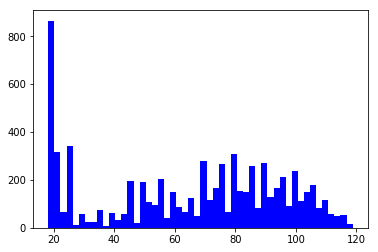

In [15]:
plt.hist(df['MonthlyCharges'],color='b',bins=50)
plt.show()

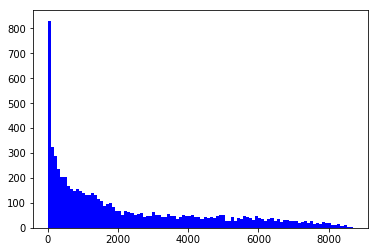

In [16]:
plt.hist(df['TotalCharges'],color='b',bins=100)
plt.show()      ##### Left Skewed #####

<b> CREATING FEATURES DATAFRAME </b>

In [30]:
df_temp=df_encode.drop('Churn',axis=1)
df_temp=df_temp.drop('MonthlyCharges',axis=1)
df_temp=df_temp.drop('TotalCharges',axis=1)
df_temp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [26]:
df_cont=df[['MonthlyCharges','TotalCharges']]

In [27]:
X_cont=df_cont.values
X_cont

array([[  29.85,   29.85],
       [  56.95, 1889.5 ],
       [  53.85,  108.15],
       ...,
       [  29.6 ,  346.45],
       [  74.4 ,  306.6 ],
       [ 105.65, 6844.5 ]])

In [31]:
X_cat=df_temp.values
X_cat

array([[1, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

# Feature Engineering On Continuous Features

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
SC= StandardScaler()
SC.fit(X_cont)
X_cont_std= SC.transform(X_cont)

In [34]:
X_cont_std

array([[-1.16120506, -0.9937937 ],
       [-0.26044923, -0.1733288 ],
       [-0.36348772, -0.95924827],
       ...,
       [-1.16951462, -0.85411194],
       [ 0.31955775, -0.87169349],
       [ 1.35825221,  2.01278342]])

In [36]:
# Concatting both the matrices(Continuous and categorical)
X=np.concatenate((X_cat,X_cont),axis=1)
X   # Feature Matrix

array([[1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 2.9850e+01,
        2.9850e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 5.6950e+01,
        1.8895e+03],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 2.9600e+01,
        3.4645e+02],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.4400e+01,
        3.0660e+02],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0565e+02,
        6.8445e+03]])

# Train Test Split

In [37]:
from sklearn.cross_validation import train_test_split
y=df['Churn'].values #Target Matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0) #Splitting X,y into Train and Test sections

# XG Boost Model Fitting

In [38]:
#importing xgboost library for Binary Classification
from xgboost import XGBClassifier

In [39]:
model=XGBClassifier(n_jobs=-1,silent=False)  # Model is defined

In [40]:
#model.fit(X_train,y_train)

# HyperParameters Tuning

<b> Using Randomized Grid Search</b>

It allows to define a grid of parameters tat will be searched using K Fold Cross Validation.

In [41]:
#DEFINING PARAMETER VALUES TO BE SEARCHED
learning_rate1= [0.05,0.1,0.3,0.5]  # step size shrinkage to get new feature weights to make boosting process more conservative
n_estimators1= range(100,500,10)    # No of trees(rounds)
min_child_weight1= range(0,5)       # Minimum sum of instance weight(hessian) needed in a child
gamma1= [0,0.5,1]                   # Minimum loss reduction required to make a further partition on a leaf node of the tree
max_depth1= range(1,11,2)           # number of layers or the depth of the tree

In [42]:
#Create a parameter Grid
param_grid=dict(learning_rate=learning_rate1,n_estimators=n_estimators1,min_child_weight=min_child_weight1,gamma=gamma1,max_depth=max_depth1)
print(param_grid)

{'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490], 'learning_rate': [0.05, 0.1, 0.3, 0.5], 'max_depth': [1, 3, 5, 7, 9], 'gamma': [0, 0.5, 1], 'min_child_weight': [0, 1, 2, 3, 4]}


In [44]:
#instance and fit grid
from sklearn.grid_search import RandomizedSearchCV
grid=RandomizedSearchCV(model, param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid.fit(X_train,y_train)

/opt/Anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/Anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/Anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/Anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

/opt/Anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/Anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/Anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/Anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490], 'learning_rate': [0.05, 0.1, 0.3, 0.5], 'max_depth': [1, 3, 5, 7, 9], 'gamma': [0, 0.5, 1], 'min_child_weight': [0, 1, 2, 3, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [45]:
grid.grid_scores_

[mean: 0.78656, std: 0.01440, params: {'n_estimators': 270, 'learning_rate': 0.05, 'max_depth': 9, 'gamma': 1, 'min_child_weight': 0},
 mean: 0.78534, std: 0.01804, params: {'n_estimators': 280, 'learning_rate': 0.1, 'max_depth': 7, 'gamma': 0, 'min_child_weight': 0},
 mean: 0.77417, std: 0.01256, params: {'n_estimators': 420, 'learning_rate': 0.5, 'max_depth': 9, 'gamma': 1, 'min_child_weight': 1},
 mean: 0.80179, std: 0.01400, params: {'n_estimators': 180, 'learning_rate': 0.05, 'max_depth': 3, 'gamma': 1, 'min_child_weight': 2},
 mean: 0.78595, std: 0.00810, params: {'n_estimators': 460, 'learning_rate': 0.1, 'max_depth': 7, 'gamma': 1, 'min_child_weight': 4},
 mean: 0.80626, std: 0.01208, params: {'n_estimators': 490, 'learning_rate': 0.3, 'max_depth': 1, 'gamma': 0.5, 'min_child_weight': 4},
 mean: 0.77782, std: 0.01425, params: {'n_estimators': 460, 'learning_rate': 0.05, 'max_depth': 9, 'gamma': 0, 'min_child_weight': 3},
 mean: 0.76198, std: 0.01896, params: {'n_estimators': 38

In [46]:
print(grid.best_score_)
print(grid.best_params_)

0.806255077173
{'n_estimators': 490, 'learning_rate': 0.3, 'max_depth': 1, 'gamma': 0.5, 'min_child_weight': 4}


In [47]:
params=grid.best_params_

In [48]:
print(params)

{'n_estimators': 490, 'learning_rate': 0.3, 'max_depth': 1, 'gamma': 0.5, 'min_child_weight': 4}


# Prediction

In [49]:
model_final= XGBClassifier(n_jobs=-1,n_estimators=117,learning_rate=0.05,gamma=1,min_child_weight=0)

In [50]:
model_final.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=0, missing=None, n_estimators=117,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [51]:
y_pred=model_final.predict(X_test)

/opt/Anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [52]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [53]:
len(y_pred)

2111

In [54]:
np.set_printoptions(threshold='nan')

# Predicted Distribution Of Cutomers Leaving Subscription

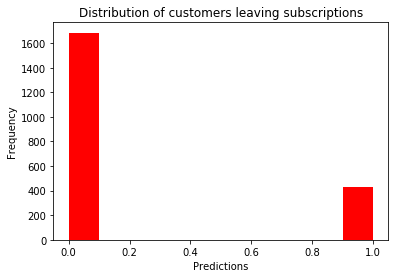

In [55]:
plt.hist(y_pred,color='r')  #y_pred-predicted values
plt.xlabel('Predictions')
plt.ylabel('Frequency')
plt.title('Distribution of customers leaving subscriptions')
plt.show()

# True Distribution Of Cutomers Leaving Subscription

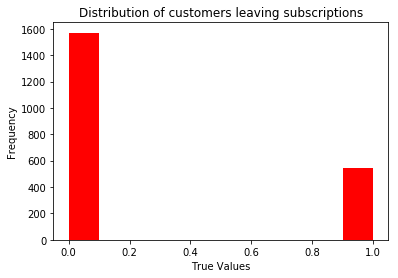

In [56]:
plt.hist(y_test,color='r')  #y_test= True Values
plt.xlabel('True Values')
plt.ylabel('Frequency')
plt.title('Distribution of customers leaving subscriptions')
plt.show()

# Predicted Probabilities

In [57]:
y_pred_probas= model_final.predict_proba(X_test)
y_pred_probas=y_pred_probas[:,1]

In [58]:
print('Predicted probabilities \n\n')
print(y_pred_probas)

Predicted probabilities 


[0.02185745 0.01757333 0.1364416  0.6846748  0.09496308 0.5944823
 0.7037784  0.01173106 0.574604   0.25647628 0.0092336  0.3042041
 0.06406204 0.6674249  0.41503152 0.07691307 0.3829879  0.49571094
 0.37664396 0.02185745 0.04821964 0.30578524 0.0561693  0.2788226
 0.35442382 0.00929834 0.01345179 0.04948482 0.03444035 0.29710662
 0.0796419  0.3444768  0.27912414 0.4679413  0.183865   0.47532004
 0.06361106 0.17778829 0.1331481  0.5017185  0.679035   0.4723824
 0.46829265 0.04307554 0.3131714  0.48322198 0.7409136  0.33548516
 0.244161   0.1809584  0.11790209 0.05548019 0.06696544 0.14182785
 0.23630744 0.66021377 0.51736504 0.2293953  0.53642493 0.19335718
 0.08532697 0.5351876  0.14327402 0.2716051  0.01919214 0.26491356
 0.029473   0.01347987 0.14123474 0.0411732  0.02198911 0.41465616
 0.04141488 0.07201717 0.23118417 0.18393645 0.65692914 0.01875816
 0.4277763  0.15489174 0.23928012 0.68731105 0.16083877 0.02973499
 0.61710864 0.03709934 0.5279703  0.009

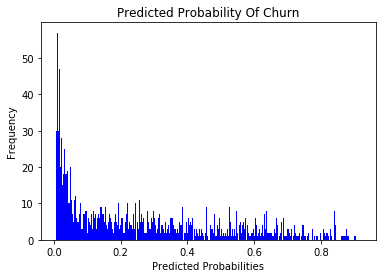

In [59]:
plt.hist(y_pred_probas,color='b',bins=500)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Predicted Probability Of Churn')
plt.show()

We Observe that :-
+ Most of the data lies below the probability of 0.4 i.e. majority of the population won;t Churn
+ Small number of observations with probability > 0.5
+ Most would be predicted "no churn" in this case

# Accuracy

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy = accuracy_score(y_test, y_pred) #Accuracy = (True Positives+ True Negatives)/(True Positives+ True Negatives+False Positives+ False Negatives)

In [62]:
print(accuracy)

0.8062529606821411


<b> Comments On Accuracy </b>

The first accuracy was calculated on X-train dataset(i.e. a part of the whole data set) using Randomized search and was calculated as 0.804224207961.

Hence Acc1= 0.804224207961

 The second Accuracy was calculated on the rest unseen 30% of the dataset known as Test dataset and is calculated as 0.8062529606821411.
 
 Hence Acc2= 0.8062529606821411
 
 We observe that both the accuracies calculated are almost equal eventhough evaluated different data sets which should also be the case ideally.

# Evaluation Metrics

# K Fold Cross Validation

+ Dataset is split into K folds of equal Size
+ Each fold acts as testing set 1 time,and acts as the training set k-1 times
+ Avg testing performance is used as out-of-sample performance
+ It reduces accuracy variance as compared to Train-Test Split Method

In [63]:
from sklearn.cross_validation import cross_val_score

In [64]:
scores= cross_val_score(model_final,X,y,cv=5,scoring='accuracy')

/opt/Anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/Anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/Anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/Anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

In [65]:
print(scores)

[0.81818182 0.80241649 0.78962331 0.81165601 0.80085349]


In [66]:
print(scores.mean())

0.8045462219853421


The mean accuracy score obtained is also almot equal to the actual accuracy score obtained.

# Confusion Matrix

In [67]:
from matplotlib import pyplot

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y_test,y_pred)

array([[1423,  147],
       [ 262,  279]])

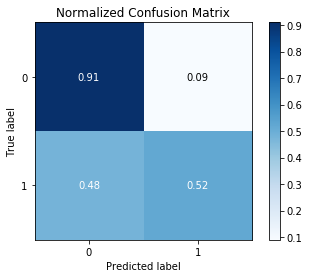

In [70]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=True)
plt.show()

# ROC Curve

In [71]:
from sklearn.metrics import roc_curve, auc

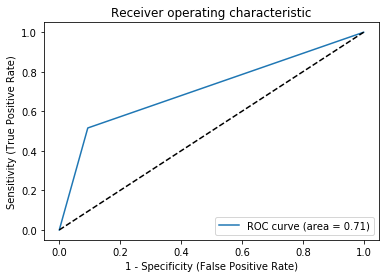

In [72]:
fpr, tpr, thres = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# KS Test

In [73]:
from scikitplot.helpers import binary_ks_curve, validate_labels

In [74]:
threshold, truevals, predictedvals, ks_statistics,max_distance_at, classes = binary_ks_curve(y_test,y_pred_probas)

In [75]:
threshold #X axis values- Population percentage

array([0.        , 0.00612752, 0.00629472, 0.00631352, 0.00648576,
       0.00699463, 0.00703804, 0.00724367, 0.00732584, 0.0073766 ,
       0.00741411, 0.00757762, 0.00760022, 0.0076798 , 0.00773904,
       0.00777942, 0.00782767, 0.0078566 , 0.00800785, 0.00887249,
       0.00891361, 0.00892234, 0.0090134 , 0.0092336 , 0.00925861,
       0.00929834, 0.00945868, 0.00949634, 0.00953874, 0.00958797,
       0.00958879, 0.00974648, 0.00975456, 0.00980681, 0.00982255,
       0.0098426 , 0.00985788, 0.00990351, 0.00995751, 0.00998687,
       0.01001157, 0.01018311, 0.01018372, 0.01023902, 0.01026701,
       0.01027709, 0.01048687, 0.01066403, 0.01077173, 0.01090809,
       0.01099865, 0.01118559, 0.01129725, 0.01135779, 0.01144018,
       0.01148921, 0.01161773, 0.01173106, 0.01184925, 0.01192702,
       0.01199767, 0.01208156, 0.01222675, 0.0122769 , 0.01233158,
       0.01256761, 0.01261332, 0.01262761, 0.01275006, 0.01278102,
       0.01291128, 0.01295109, 0.01295518, 0.01299148, 0.01307

In [76]:
truevals  #Y axis values for y_test-POSITIVE RESPONDERS(CLASS 1)

array([0.        , 0.00191083, 0.0044586 , 0.00573248, 0.00700637,
       0.00764331, 0.00828025, 0.0089172 , 0.01082803, 0.01146497,
       0.01210191, 0.01273885, 0.01401274, 0.01464968, 0.01528662,
       0.01592357, 0.01847134, 0.01910828, 0.01974522, 0.02038217,
       0.02165605, 0.02229299, 0.02292994, 0.02356688, 0.02420382,
       0.02484076, 0.02547771, 0.02675159, 0.02738854, 0.02738854,
       0.02802548, 0.02866242, 0.02929936, 0.02993631, 0.03121019,
       0.03184713, 0.03248408, 0.03503185, 0.03566879, 0.0388535 ,
       0.03949045, 0.04012739, 0.04076433, 0.04140127, 0.0433121 ,
       0.04394904, 0.04968153, 0.05031847, 0.05414013, 0.05732484,
       0.05796178, 0.0611465 , 0.06305732, 0.06369427, 0.06433121,
       0.06496815, 0.0656051 , 0.06687898, 0.06751592, 0.06815287,
       0.06878981, 0.06942675, 0.07006369, 0.07070064, 0.07324841,
       0.07388535, 0.08025478, 0.08089172, 0.08152866, 0.08216561,
       0.08280255, 0.08343949, 0.08726115, 0.08789809, 0.08853

In [77]:
predictedvals   #Y axis values for y_pred- NEGATIVE RESPONDERS(CLASS 0)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00369686,
       0.00369686, 0.00369686, 0.00369686, 0.00369686, 0.00369686,
       0.00369686, 0.00369686, 0.00369686, 0.00369686, 0.00369686,
       0.00369686, 0.00369686, 0.00369686, 0.00369686, 0.00369686,
       0.00369686, 0.00369686, 0.00369686, 0.00369686, 0.00369

In [78]:
ks_statistics # Max distance between the two curves

0.552435334424338

In [79]:
max_distance_at  #max distance point on X-axis

0.32996290922164917

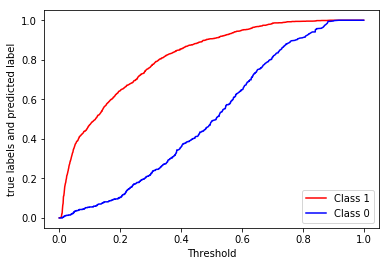

In [80]:
plt.plot(threshold,truevals,color='r',label='Class 1')
plt.plot(threshold,predictedvals,color='b',label='Class 0')
plt.xlabel('Threshold')
plt.ylabel('true labels and predicted label')
#plt.legend('Distribution of customers leaving subscriptions')
plt.legend(loc="lower right")
plt.show()

In [81]:
KS_population_pd=pd.DataFrame(threshold*100,columns=['Population Percentage'])
KS_population_pd

,Population Percentage
0,0.000000
1,0.612752
2,0.629472
3,0.631352
4,0.648576
5,0.699463
6,0.703804
7,0.724367
8,0.732584
9,0.737660


In [82]:
KS_Gains1=pd.DataFrame(truevals*100,columns=['% Positive Responders'])
KS_Gains1

,% Positive Responders
0,0.000000
1,0.191083
2,0.445860
3,0.573248
4,0.700637
5,0.764331
6,0.828025
7,0.891720
8,1.082803
9,1.146497


In [83]:
KS_Gains0=pd.DataFrame(predictedvals*100,columns=['% Negative Responders'])
KS_Gains0

,% Negative Responders
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [84]:
KS_Chart = pd.concat([KS_population_pd,KS_Gains1,KS_Gains0], axis=1)
KS_Chart

,Population Percentage,% Positive Responders,% Negative Responders
0,0.000000,0.000000,0.000000
1,0.612752,0.191083,0.000000
2,0.629472,0.445860,0.000000
3,0.631352,0.573248,0.000000
4,0.648576,0.700637,0.000000
5,0.699463,0.764331,0.000000
6,0.703804,0.828025,0.000000
7,0.724367,0.891720,0.000000
8,0.732584,1.082803,0.000000
9,0.737660,1.146497,0.000000


# Gains Chart

In [85]:
npos=np.sum(y_test)  #No. of positive(Churn) instances
npos

541

In [86]:
# indices that would sort according to probability score
index=np.argsort(y_pred_probas)

In [87]:
#Reverse order- Descending Order
index= index[::-1]

In [88]:
index

array([1502, 1934,  841,  325, 2085,  930,  339, 1826,  208,  265, 1366,
        688,  901, 1568, 1105, 2050,  506, 1673,  770, 1365,   89, 1866,
        782,  666, 1488,  887,  257, 1508, 1224,  759, 1029, 1973, 1875,
       1165,  134,  268,  961, 1672,  928, 1213,  836,  460,  648,  356,
       2107, 1831,  508,  639, 1092,  504, 1161,  277, 1227, 1299, 1782,
       1054, 2057, 1024, 1091, 1695, 2025,  717,  599,  527, 1156, 1288,
        941,  326, 1930,  357, 1215,  383, 1485, 1000,  623, 1378,  382,
        110, 1172,  931,  570,  180, 1865, 1407, 1998,   46,  960, 1677,
       1369, 1585,  551, 1602, 1969, 1809, 2090, 1326, 1547, 1656,  898,
        746, 1081,  365,  917,  218,  432, 2104, 1704,  467, 1939,  546,
        846, 2071,  500, 2049,  729, 1783,  780,  230,  705,    6,  974,
       1710, 1600,  998,  430, 1151,  838, 1915, 1747, 1003,  427,  893,
         91, 1579, 1593,  261, 1581,  498, 1014, 2076, 1584, 1604,  638,
       2100, 2024,  854,  791, 1416,   81,    3, 10

In [89]:
#sort class memebership
sort_pos=y_test[index] 

In [90]:
sort_pos

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,

In [91]:
#cumulated sum of true values
cpos=np.cumsum(sort_pos)

In [92]:
cpos  #Cumulative Posive Responders

array([  1,   2,   3,   3,   4,   5,   6,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  22,  23,
        24,  24,  24,  25,  26,  27,  28,  29,  29,  30,  31,  32,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  43,  44,
        45,  46,  47,  48,  48,  49,  50,  51,  52,  53,  54,  54,  55,
        56,  56,  56,  57,  58,  59,  60,  61,  62,  63,  64,  64,  65,
        65,  65,  66,  67,  67,  68,  69,  70,  70,  71,  72,  73,  74,
        74,  74,  75,  76,  77,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        96,  97,  98,  99, 100, 100, 100, 100, 101, 102, 102, 102, 102,
       103, 104, 105, 106, 107, 107, 107, 108, 108, 108, 109, 110, 111,
       112, 112, 113, 113, 114, 114, 114, 114, 115, 116, 116, 117, 117,
       117, 118, 119, 120, 121, 122, 123, 123, 124, 125, 126, 126, 127,
       127, 127, 128, 128, 129, 130, 130, 131, 132, 133, 133, 13

In [93]:
cpos1=cpos.astype(float)

In [94]:
gains= np.divide(cpos1,npos)

In [95]:
gains   #Y-axis

array([0.00184843, 0.00369686, 0.00554529, 0.00554529, 0.00739372,
       0.00924214, 0.01109057, 0.01109057, 0.012939  , 0.01478743,
       0.01663586, 0.01848429, 0.02033272, 0.02218115, 0.02402957,
       0.025878  , 0.02772643, 0.02957486, 0.03142329, 0.03327172,
       0.03512015, 0.03696858, 0.03881701, 0.04066543, 0.04066543,
       0.04251386, 0.04436229, 0.04436229, 0.04436229, 0.04621072,
       0.04805915, 0.04990758, 0.05175601, 0.05360444, 0.05360444,
       0.05545287, 0.05730129, 0.05914972, 0.05914972, 0.06099815,
       0.06284658, 0.06469501, 0.06654344, 0.06839187, 0.0702403 ,
       0.07208872, 0.07393715, 0.07578558, 0.07763401, 0.07948244,
       0.07948244, 0.08133087, 0.0831793 , 0.08502773, 0.08687616,
       0.08872458, 0.08872458, 0.09057301, 0.09242144, 0.09426987,
       0.0961183 , 0.09796673, 0.09981516, 0.09981516, 0.10166359,
       0.10351201, 0.10351201, 0.10351201, 0.10536044, 0.10720887,
       0.1090573 , 0.11090573, 0.11275416, 0.11460259, 0.11645

In [96]:
n= y_test.shape[0]

In [97]:
n

2111

In [98]:
population=np.arange(start=1.0,stop=2112.0,step=1)

In [99]:
pop=population/n

In [100]:
pop  #X-axis

array([4.73709143e-04, 9.47418285e-04, 1.42112743e-03, 1.89483657e-03,
       2.36854571e-03, 2.84225486e-03, 3.31596400e-03, 3.78967314e-03,
       4.26338228e-03, 4.73709143e-03, 5.21080057e-03, 5.68450971e-03,
       6.15821885e-03, 6.63192800e-03, 7.10563714e-03, 7.57934628e-03,
       8.05305542e-03, 8.52676457e-03, 9.00047371e-03, 9.47418285e-03,
       9.94789199e-03, 1.04216011e-02, 1.08953103e-02, 1.13690194e-02,
       1.18427286e-02, 1.23164377e-02, 1.27901468e-02, 1.32638560e-02,
       1.37375651e-02, 1.42112743e-02, 1.46849834e-02, 1.51586926e-02,
       1.56324017e-02, 1.61061108e-02, 1.65798200e-02, 1.70535291e-02,
       1.75272383e-02, 1.80009474e-02, 1.84746566e-02, 1.89483657e-02,
       1.94220748e-02, 1.98957840e-02, 2.03694931e-02, 2.08432023e-02,
       2.13169114e-02, 2.17906206e-02, 2.22643297e-02, 2.27380388e-02,
       2.32117480e-02, 2.36854571e-02, 2.41591663e-02, 2.46328754e-02,
       2.51065846e-02, 2.55802937e-02, 2.60540028e-02, 2.65277120e-02,
      

In [101]:
######## Plotting Gains Curve ##########

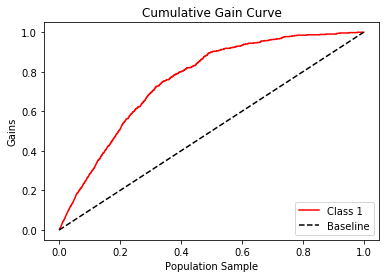

In [102]:
plt.plot(pop,gains,'r',label='Class 1')
plt.xlabel('Population Sample')
plt.ylabel('Gains')
plt.plot([0,1],[0,1],'k--',label='Baseline')
plt.legend(loc="lower right")
plt.title('Cumulative Gain Curve')
plt.show()

In [103]:
######### Gains Chart ##########

In [104]:
population_pd=pd.DataFrame(population,columns=['Population'])
population_pd

,Population
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,10.0


In [105]:
population_perct=(population/2111.0)*100  #Calculating Population Percentage
population_perct

array([4.73709143e-02, 9.47418285e-02, 1.42112743e-01, 1.89483657e-01,
       2.36854571e-01, 2.84225486e-01, 3.31596400e-01, 3.78967314e-01,
       4.26338228e-01, 4.73709143e-01, 5.21080057e-01, 5.68450971e-01,
       6.15821885e-01, 6.63192800e-01, 7.10563714e-01, 7.57934628e-01,
       8.05305542e-01, 8.52676457e-01, 9.00047371e-01, 9.47418285e-01,
       9.94789199e-01, 1.04216011e+00, 1.08953103e+00, 1.13690194e+00,
       1.18427286e+00, 1.23164377e+00, 1.27901468e+00, 1.32638560e+00,
       1.37375651e+00, 1.42112743e+00, 1.46849834e+00, 1.51586926e+00,
       1.56324017e+00, 1.61061108e+00, 1.65798200e+00, 1.70535291e+00,
       1.75272383e+00, 1.80009474e+00, 1.84746566e+00, 1.89483657e+00,
       1.94220748e+00, 1.98957840e+00, 2.03694931e+00, 2.08432023e+00,
       2.13169114e+00, 2.17906206e+00, 2.22643297e+00, 2.27380388e+00,
       2.32117480e+00, 2.36854571e+00, 2.41591663e+00, 2.46328754e+00,
       2.51065846e+00, 2.55802937e+00, 2.60540028e+00, 2.65277120e+00,
      

In [106]:
population_perct_pd=pd.DataFrame(population_perct,columns=['Population Percentage'])  #population Percentage in pandas
population_perct_pd

,Population Percentage
0,0.047371
1,0.094742
2,0.142113
3,0.189484
4,0.236855
5,0.284225
6,0.331596
7,0.378967
8,0.426338
9,0.473709


In [107]:
cpos_pd=pd.DataFrame(cpos,columns=['Cumulative Positive Responders'])  #Cumulative Positive Responders in pandas
cpos_pd

,Cumulative Positive Responders
0,1
1,2
2,3
3,3
4,4
5,5
6,6
7,6
8,7
9,8


In [108]:
gains_pd=pd.DataFrame(gains*100,columns=['Positive Responders %'])  ##Cumulative percentage og positive responders
gains_pd

,Positive Responders %
0,0.184843
1,0.369686
2,0.554529
3,0.554529
4,0.739372
5,0.924214
6,1.109057
7,1.109057
8,1.293900
9,1.478743


In [109]:
############## GAINS CHART###################
gains_chart = pd.concat([population_pd,population_perct_pd,cpos_pd,gains_pd], axis=1)
gains_chart

,Population,Population Percentage,Cumulative Positive Responders,Positive Responders %
0,1.0,0.047371,1,0.184843
1,2.0,0.094742,2,0.369686
2,3.0,0.142113,3,0.554529
3,4.0,0.189484,3,0.554529
4,5.0,0.236855,4,0.739372
5,6.0,0.284225,5,0.924214
6,7.0,0.331596,6,1.109057
7,8.0,0.378967,6,1.109057
8,9.0,0.426338,7,1.293900
9,10.0,0.473709,8,1.478743


# Lift Chart

In [110]:
########### Plotting Lift Curve########

In [111]:
lift=np.divide(gains,pop)

In [112]:
lift

array([3.90203327, 3.90203327, 3.90203327, 2.92652495, 3.12162662,
       3.25169439, 3.34459995, 2.92652495, 3.03491477, 3.12162662,
       3.19257268, 3.25169439, 3.30172046, 3.34459995, 3.38176217,
       3.41427911, 3.44297053, 3.46847402, 3.49129293, 3.51182994,
       3.53041106, 3.54730297, 3.56272603, 3.57686383, 3.43378928,
       3.45179866, 3.46847402, 3.34459995, 3.22926891, 3.25169439,
       3.27267307, 3.29234057, 3.31081611, 3.32820485, 3.23311328,
       3.25169439, 3.26927112, 3.28592276, 3.20166833, 3.21917745,
       3.23583247, 3.25169439, 3.26681855, 3.28125525, 3.29505032,
       3.3082456 , 3.32087938, 3.33298675, 3.34459995, 3.35574861,
       3.28994962, 3.30172046, 3.31304712, 3.32395427, 3.3344648 ,
       3.34459995, 3.28592276, 3.29654535, 3.30680786, 3.31672828,
       3.32632344, 3.33560909, 3.34459995, 3.29234057, 3.30172046,
       3.31081611, 3.26140094, 3.21343916, 3.22341879, 3.23311328,
       3.24253469, 3.25169439, 3.26060314, 3.26927112, 3.27770

In [113]:
lift_pd=pd.DataFrame(lift,columns=['Lift'])
lift_pd

,Lift
0,3.902033
1,3.902033
2,3.902033
3,2.926525
4,3.121627
5,3.251694
6,3.344600
7,2.926525
8,3.034915
9,3.121627


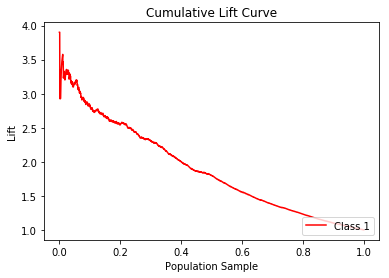

In [114]:
plt.plot(pop,lift,'r',label='Class 1')
plt.xlabel('Population Sample')
plt.ylabel('Lift')
#plt.plot([0,1],[0,1],'k--',label='Baseline')
plt.legend(loc="lower right")
plt.title('Cumulative Lift Curve')
plt.show()

In [115]:
######## Cumulative Lift Chart #########
lift_chart = pd.concat([population_pd,population_perct_pd,cpos_pd,gains_pd,lift_pd], axis=1)
lift_chart

,Population,Population Percentage,Cumulative Positive Responders,Positive Responders %,Lift
0,1.0,0.047371,1,0.184843,3.902033
1,2.0,0.094742,2,0.369686,3.902033
2,3.0,0.142113,3,0.554529,3.902033
3,4.0,0.189484,3,0.554529,2.926525
4,5.0,0.236855,4,0.739372,3.121627
5,6.0,0.284225,5,0.924214,3.251694
6,7.0,0.331596,6,1.109057,3.344600
7,8.0,0.378967,6,1.109057,2.926525
8,9.0,0.426338,7,1.293900,3.034915
9,10.0,0.473709,8,1.478743,3.121627


In [ ]:
`